In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

import gmplot

from mpl_toolkits.basemap import Basemap

In [10]:
listings = pd.read_csv(r'data\boston-airbnb-open-data\listings.csv')


In [11]:
df = pd.DataFrame()
df['latitude'] = listings['latitude'].ffill()
df['longitude'] = listings['longitude'].ffill()
latitudes = df['latitude']
longitudes = df['longitude']

latitudes = latitudes.tolist()
longitudes = longitudes.tolist()

print(latitudes[0:5])


print(type(latitudes))

[42.282618799999995, 42.286240820000003, 42.292437890000002, 42.281106190000003, 42.284512210000003]
<class 'list'>


#### Reading Boston's hotels data from csv file

In [12]:
fname = r'data\foursquare.json'

hotelsDF = pd.read_csv(r'G:\Git\PYTHON\AirbnbDataAnalysis\data\hotelsData\hotel.csv', encoding = 'ISO-8859-1')
print(hotelsDF.head())
  
    
hotel_latitude = hotelsDF.latitude
hotel_longitude = hotelsDF.longitude

hotels_lat = hotel_latitude.tolist()
hotels_lng = hotel_longitude.tolist()

print(type(hotel_latitude[0]))

    latitude  longitude                              hotel_name
0  42.347363 -71.077000            Boston Marriott Copley Place
1  42.367477 -71.022000             Hilton Boston Logan Airport
2  42.349241 -71.079517                         The Lenox Hotel
3  42.362090 -71.070000  The Liberty, a Luxury Collection Hotel
4  42.350810 -71.065500                                W Boston
<class 'numpy.float64'>


In [20]:
gmap = gmplot.GoogleMapPlotter(hotels_lat[0], hotels_lng[0], 14)

gmap.scatter(latitudes, longitudes, '#3F3067', size=20, marker=False)
gmap.scatter(hotels_lat, hotels_lng, '#BB1F5C', size=20, marker=False)

gmap.draw(r'results\mymap.html')

# Airbnb Rental vs. Hotels

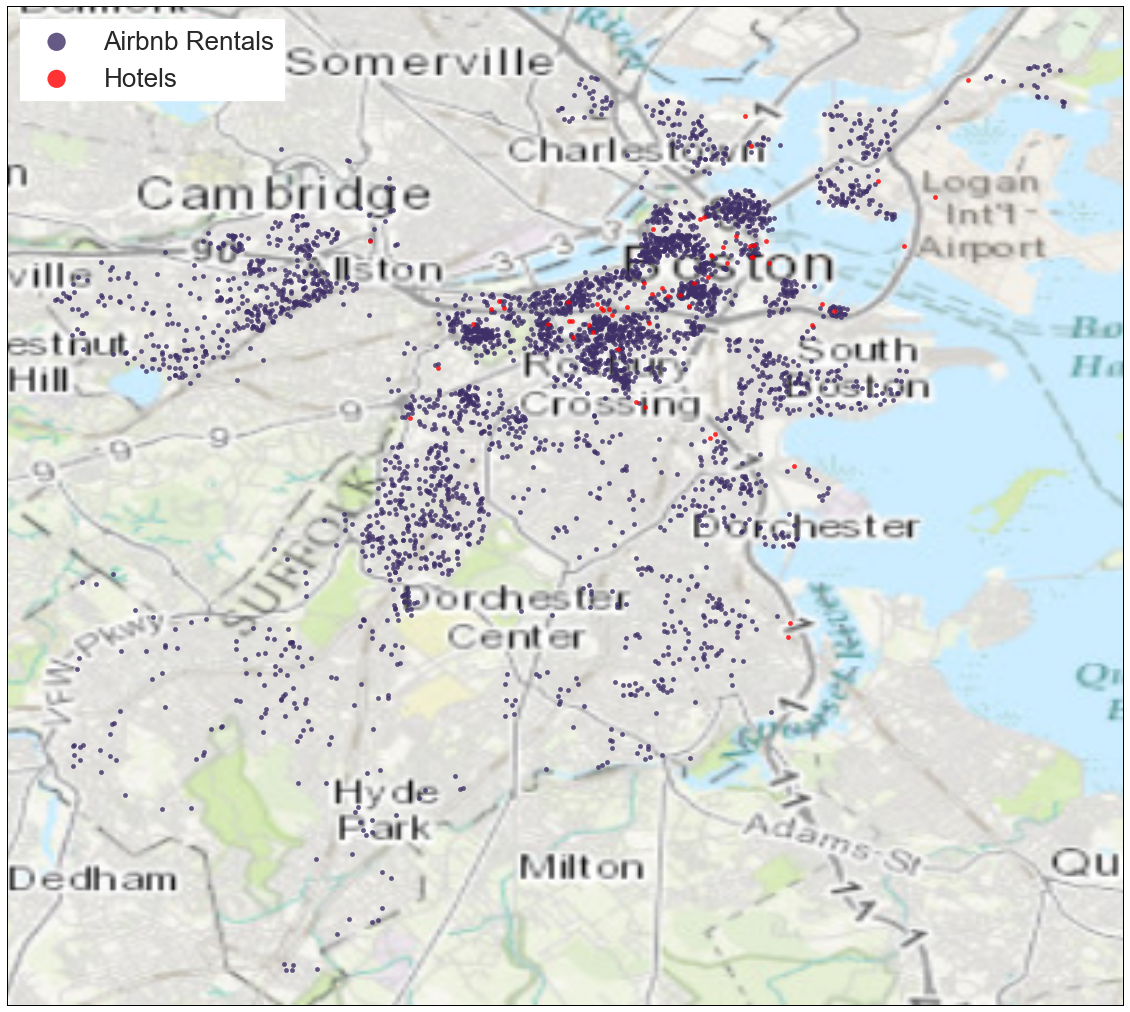

In [15]:
figComp= plt.figure(figsize=(20,20))


themap = Basemap(projection='mill', llcrnrlat=42.23, urcrnrlat=42.4, llcrnrlon=-71.18, urcrnrlon=-70.99, epsg=4269)

themap.drawcountries()
themap.drawstates()
themap.drawrivers()
themap.drawmapboundary()
themap.arcgisimage(service='World_Topo_Map')
ncolors = 20

cmap = plt.get_cmap('coolwarm')

x,y = themap(listings.longitude.values, listings.latitude.values)
themap.scatter(x,y, color = '#3F3067', alpha=0.8, label = 'Airbnb Rentals')

x1,y1 = themap(hotel_longitude, hotel_latitude)
themap.scatter(x1,y1, color = 'red', alpha=0.8, label='Hotels')

legend = plt.legend(frameon = True, fontsize=26, loc='upper left', markerscale=4)
frame = legend.get_frame()
frame.set_color('white')
plt.show()

In [88]:
print(type(listings.longitude.values[0]))

<class 'numpy.float64'>


In [55]:
# clean price data
listings.price = listings.price.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x)) 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


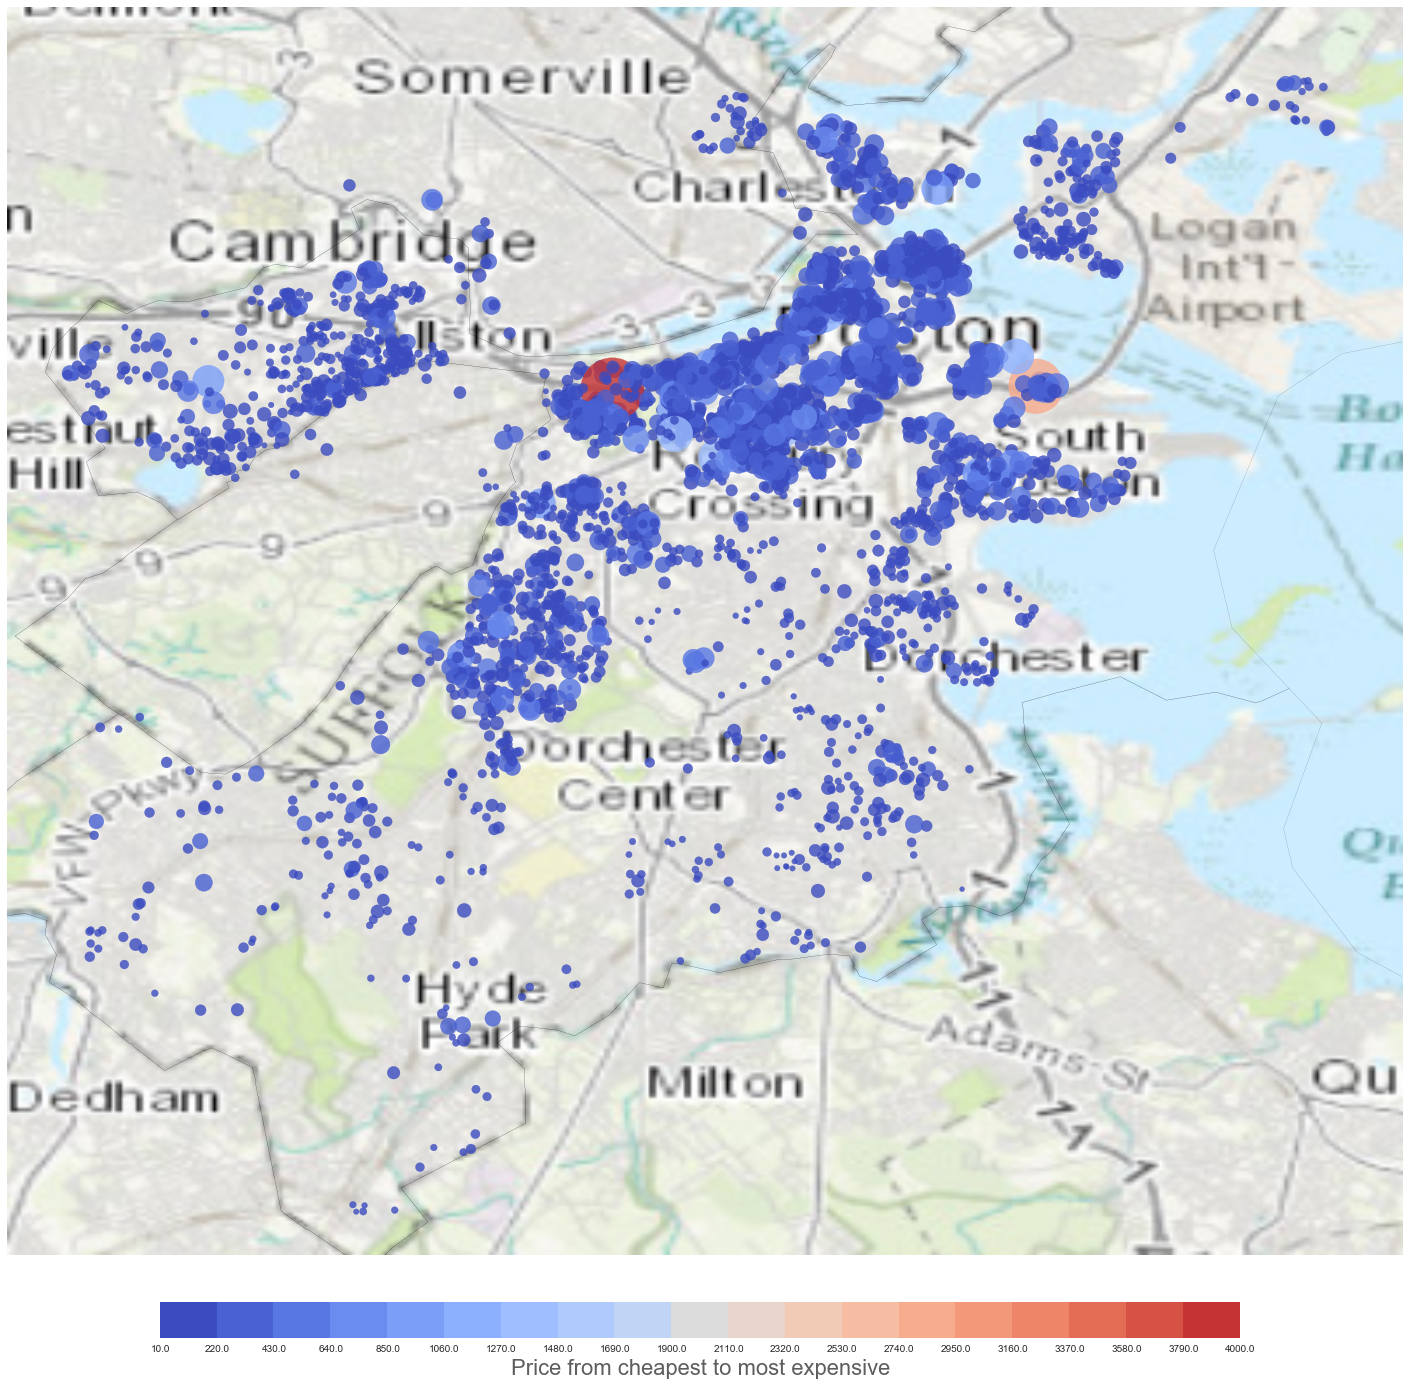

In [61]:
fig = plt.figure(figsize=(25,25))

m = Basemap(projection='merc', 
            llcrnrlat=42.23, 
            urcrnrlat=42.4, 
            llcrnrlon=-71.18, 
            urcrnrlon=-70.99,
            epsg=4269)

m.drawcounties()

num_colors = 20
values = listings.price
cm = plt.get_cmap('coolwarm')

scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)

listings['bin'] = np.digitize(values, bins) - 1

cmap = mpl.colors.ListedColormap(scheme)

color = [scheme[listings[(listings.latitude==x)&(listings.longitude==y)]['bin'].values] 
             for x,y in zip(listings.latitude, listings.longitude)]

x,y = m(listings.longitude.values, listings.latitude.values)

scat = m.scatter(x, y, 
                 s = listings.price, 
                 color = color, 
                 cmap=cmap, 
                 alpha=0.8)

m.arcgisimage(service='World_Topo_Map')

# Draw color legend.
                        #[left, top, width, height]
ax_legend = fig.add_axes([0.21, 0.12, 0.6, 0.02])

cb = mpl.colorbar.ColorbarBase(ax_legend, 
                               cmap=cmap, 
                               ticks=bins, 
                               boundaries=bins, 
                               orientation='horizontal')

cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

cb.set_label("Price from cheapest to most expensive",
            fontsize=22,
            alpha = 0.75)


plt.show()